In [48]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [49]:
def get_data_noisysine():
    data = pd.read_csv("datasets/noisysine.csv").values
    points=[]
    for d in data[:, 0] :
        points.append(np.array([d]))
    return np.array(points), data[:, 1]

def get_data_hydrodynamics():
    data = pd.read_csv("datasets/hydrodynamics.csv").values
    points=[]
    for d in data[:, 0:-1] :
        points.append(np.array(d))
    return np.array(points), data[:, -1]


def split_data(points, labels):
    points_train, points_test, labels_train, labels_test = train_test_split(points, labels, train_size=0.8)  
    return points_train, labels_train, points_test,  labels_test

In [50]:
def inv(x, y, a):
    return np.linalg.inv(np.transpose(x) @ x + a *np.identity(x.shape[1])) @ np.transpose(x) @ y

def h(m, x, degree):
    return m.predict(PolynomialFeatures(degree=degree).fit_transform(x))
    
def polynomial_regression(points_train, labels_train, points_test,  labels_test,degree, a):
    points_train_f = PolynomialFeatures(degree=degree).fit_transform(points_train)
    m = Lasso(alpha=a, max_iter=100000, tol=0.0001)
    m.fit(points_train_f, labels_train)
    labels_test_n = h(m, points_test, degree)
    score  = 1 - (np.sum((labels_test_n - labels_test) ** 2)) / (np.sum((labels_test - np.mean(labels_test)) ** 2))
    return m, score, np.sum(m.coef_ != 0)

def plot(points, labels, m, degree):
    matplotlib.rcParams['figure.figsize'] = [5, 5]
    points_min = points.min() - 1
    points_max = points.max() + 1
    points_n = np.arange(points_min, points_max, 0.02).reshape(-1, 1)
    labels_n = h(m, points_n, degree)
    plt.scatter(points, labels)
    plt.plot(points_n, labels_n, color='blue')
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    
def optimize(points_train, labels_train, points_test,  labels_test, degree):
    max_m = None
    max_score = None
    max_a = None
    max_uf = None
    for i in range(10):
        a = 10 ** (-i)
        m, score, uf = polynomial_regression(points_train, labels_train, points_test,  labels_test, degree, a)
        if max_score is None or score > max_score:
            max_m = m
            max_score = score
            max_alpha = a
            max_uf = uf
    return max_m, max_score, max_alpha, max_uf

1(alpha=1, #used features=1): -0.02676320691712597


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


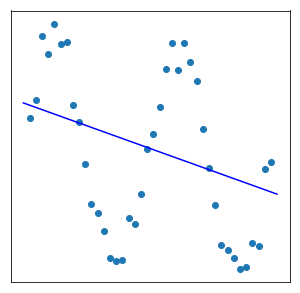

2(alpha=1e-05, #used features=2): -0.18726374134472068


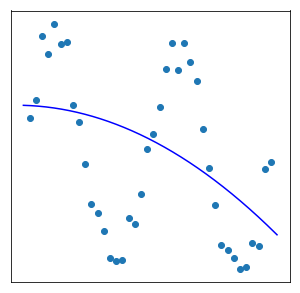

3(alpha=0.01, #used features=3): -0.14574068077383506


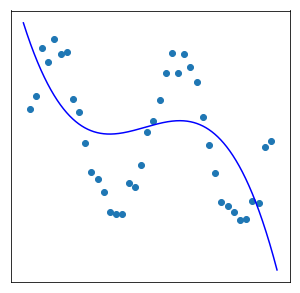

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

4(alpha=1e-09, #used features=4): -0.07338494225045067


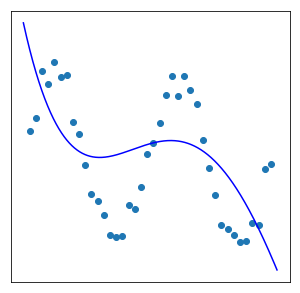

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

5(alpha=0.1, #used features=4): 0.5357238791811127


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


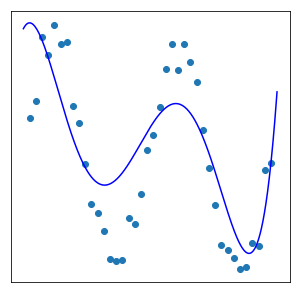

In [52]:
points, labels = get_data_noisysine()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
for d in [1, 2,3, 4, 5]:
    m, score, a, uf = optimize(points_train, labels_train, points_test,  labels_test, d)
    print(str(d) + "(alpha=" + str(a) + ", #used features=" + str(uf) + "): " + str(score))
    plot(points, labels, m, d)

In [53]:
points, labels = get_data_hydrodynamics()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
for d in [1, 2]:
    m, score, a, uf = optimize(points_train, labels_train, points_test,  labels_test, d)
    print(str(d) + "(alpha=" + str(a) + ", #used features=" + str(uf) + "): " + str(score))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


1(alpha=0.1, #used features=3): 0.6111818200446446


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

2(alpha=0.001, #used features=17): 0.9130589114985512


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
